# Binary Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# hypothesis: Logistic function/Sigmoid Function

def _sigmoid(z):
    return 1/(1 + np.exp(-z))    

def hypothesis(theta):
    """theta: a vertical vector"""
    return lambda x: _sigmoid(x.dot(theta))


# cost function

def cost(theta, x, y):
    return np.squeeze(1/x.shape[0]*(- y.T.dot(np.log(hypothesis(theta)(x))) - (1 - y).T.dot(np.log(1 - hypothesis(theta)(x)))))

def cost_derivative(theta, x, y):
    N = len(x)
    h = hypothesis(theta)
    return 1/N * x.T.dot(h(x)-y)

[[0]
 [1]
 [2]
 [3]]
[[0.]
 [0.]
 [0.]
 [0.]]


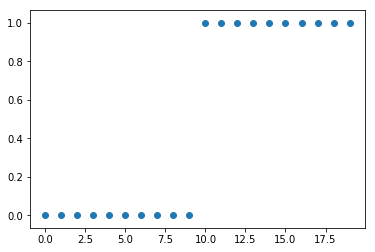

In [2]:
def generate_linear_multivariate_data(a, N):
    """generate multivariate data
    :param np.array a are the parameters (including bias)"""
    dim = len(a)
    x = np.tile(np.arange(0,N), (dim-1, 1)).T
    
    # x<N/2 -> 0; x>=N/2 -> 1 
    y = np.vstack((np.zeros(shape=(N//2, 1)), np.ones(shape=(N-N//2, 1))))
    return x, y

x, y = generate_linear_multivariate_data(np.array([0, 2]), 20)
print(x[:4])
print(y[:4])   

plt.scatter(x, y)

In [3]:
def gradient_descent(x, y, alpha=0.005, num_steps=1000):
    """Given data, return the weights of the best fit"""
    x_bias = np.hstack((np.ones((x.shape[0], 1)), x))
    a = np.random.normal(size=(x_bias.shape[1], 1))
    
    for i in range(num_steps):
        c = cost(a, x_bias, y)
        new_a = a - alpha * cost_derivative(a, x_bias, y)
        if i%1000==0: print("Iteration: ", i, "cost: ", c)
        a = new_a
    return a



In [4]:
a = gradient_descent(x,y, alpha=0.1, num_steps=10000)
print(a)

Iteration:  0 cost:  10.053782683663584
Iteration:  1000 cost:  0.136646987207103
Iteration:  2000 cost:  0.10396101902363003
Iteration:  3000 cost:  0.08902936399305553
Iteration:  4000 cost:  0.07984219056081879
Iteration:  5000 cost:  0.07338803747362804
Iteration:  6000 cost:  0.06849740426361108
Iteration:  7000 cost:  0.06460524134279337
Iteration:  8000 cost:  0.06139932507477568
Iteration:  9000 cost:  0.05869058036842424
[[-13.12212687]
 [  1.39490401]]


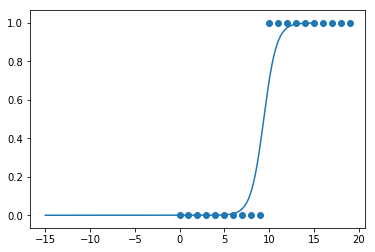

In [5]:
x_arr = np.hstack((np.ones((300, 1)), np.arange(-15, 15, 0.1).reshape(300, 1)))
y_arr = hypothesis(a)(x_arr)
plt.scatter(x, y)
plt.plot(x_arr[:, 1], y_arr)
plt.show()

In [6]:
# x=9  -> y=0 -> probability < 0.5
print(x[9], hypothesis(a)(np.concatenate((np.array([1]), x[9]))))
# x=10 -> y=1 -> probability > 0.5
print(x[10], hypothesis(a)(np.concatenate((np.array([1]), x[10]))))

[9] [0.36170057]
[10] [0.69570186]
